# Task 1

In [2]:
x = read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
head(x)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [3]:
# install.packages("Information")
library(Information)

In [4]:
x$rank=factor(x$rank)
head(x)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<fct>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


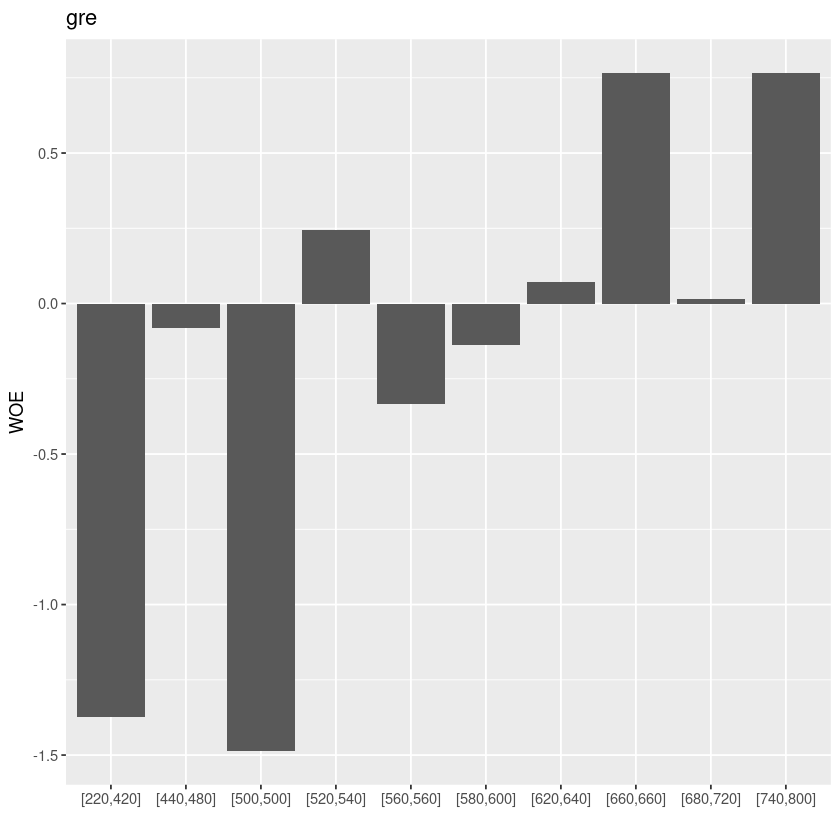

In [5]:
x$rank=factor(x$rank)
IV=create_infotables(data=x,y="admit",bins=10)
plot_infotables(IV,"gre")

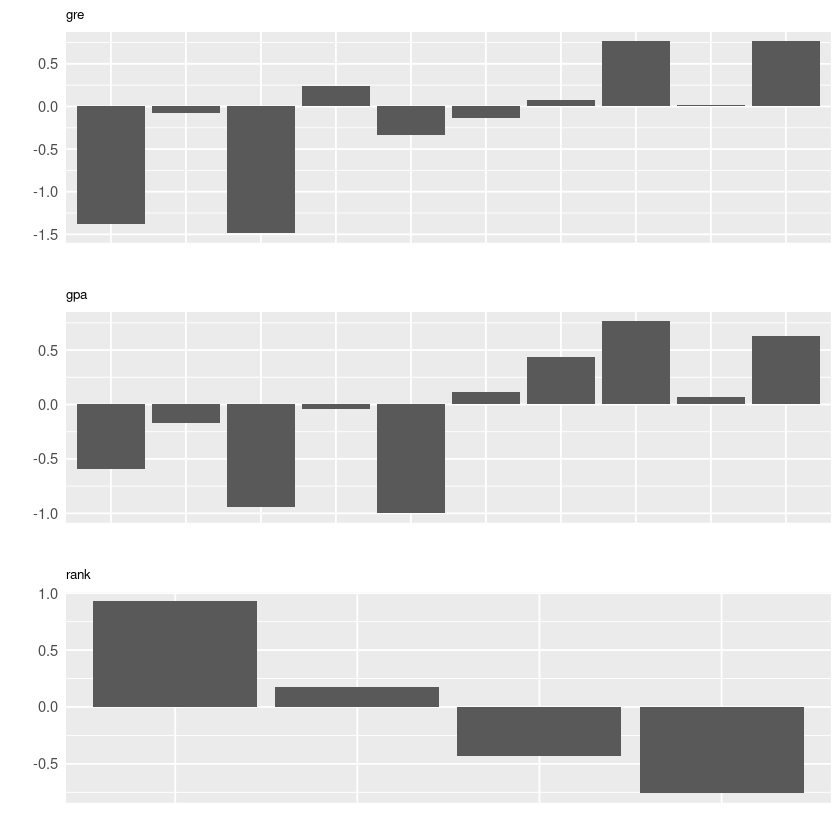

In [6]:
plot_infotables(IV,IV$Summary$Variable[1:3],same_scale=FALSE)

In [7]:
res=matrix(data=NA,nrow=9,ncol=2)
for (k in 4:12){
  IV=create_infotables(data=x,y="admit",bins=k)
  res[k-3,]=c(IV$Summary[1,2],IV$Summary[2,2])
}

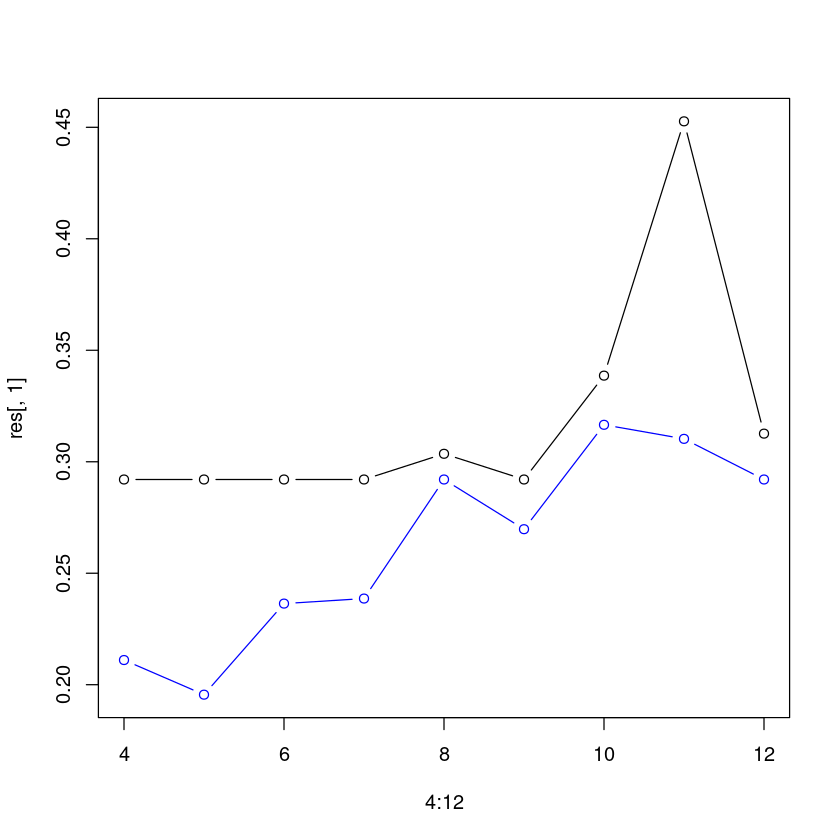

In [8]:
plot(4:12,res[,1],type="b",ylim=c(min(res),max(res)))
points(4:12,res[,2],type="b",col="blue")

In [9]:
IV=create_infotables(data=x,y="admit",bins=11)
IV$Tables$gre
gre_int=c(420,480,520,540,580,600,620,660,700,740,801)
IV=create_infotables(data=x,y="admit",bins=10)
IV$Tables$gpa
gpa_int=c(2.9,3.04,3.17,3.31,3.39,3.49,3.61,3.75,3.94,5)
average=matrix(data=NA,nrow=11,ncol=10)
for (j in 1:11){
  for (k in 1:10){
    ind=which(x$gre<gre_int[j] & x$gpa<gpa_int[k])
    average[j,k]=mean(x$admit[ind])
  }
  x$gre[ind]=1000
}
average

gre,N,Percent,WOE,IV
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
"[220,400]",31,0.0775,-1.14425780,0.07712874
"[420,460]",31,0.0775,-0.66183165,0.10646839
"[480,500]",37,0.0925,-0.52256958,0.12906168
"[520,520]",24,0.0600,0.42881247,0.14083606
"[540,560]",51,0.1275,-0.11018403,0.14235196
"[580,580]",29,0.0725,-0.57845004,0.16375750
"[600,600]",23,0.0575,0.32345196,0.17009201
"[620,640]",51,0.1275,0.07213753,0.17076405
"[660,680]",44,0.1100,0.67431293,0.22545437


gpa,N,Percent,WOE,IV
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
"[2.26,2.88]",39,0.0975,-0.58926095,0.02979362
"[2.9,3.03]",39,0.0975,-0.16902453,0.03248955
"[3.04,3.16]",39,0.0975,-0.93946338,0.10166696
"[3.17,3.3]",39,0.0975,-0.04564551,0.10186839
"[3.31,3.38]",41,0.1025,-0.99830388,0.18269210
"[3.39,3.48]",38,0.0950,0.11135824,0.18389333
"[3.49,3.6]",43,0.1075,0.43678064,0.20580102
"[3.61,3.74]",40,0.1000,0.76528471,0.27025349
"[3.75,3.93]",39,0.0975,0.07213753,0.27076740


0.3333333,0.1666667,0.17647059,0.2105263,0.1538462,0.14814815,0.1379310,0.1290323,0.1290323,0.1290323
0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.12000000,0.1153846,0.1785714,0.1666667,0.1935484
0.2500000,0.2666667,0.27777778,0.2500000,0.2272727,0.18518519,0.2187500,0.2424242,0.2352941,0.2162162
0.2000000,0.1250000,0.09090909,0.2000000,0.1875000,0.18750000,0.1764706,0.3000000,0.3636364,0.4166667
0.1666667,0.2222222,0.12500000,0.1304348,0.1379310,0.18181818,0.2439024,0.2558140,0.3061224,0.2941176
0.5000000,0.2500000,0.33333333,0.3000000,0.3076923,0.26315789,0.2608696,0.2500000,0.2307692,0.2068966
0.0000000,0.3333333,0.40000000,0.2857143,0.2727273,0.28571429,0.3888889,0.3809524,0.3913043,0.3913043
0.0000000,0.3333333,0.14285714,0.3125000,0.3333333,0.33333333,0.2857143,0.3055556,0.2857143,0.3333333
1.0000000,1.0000000,0.55555556,0.5454545,0.3529412,0.40909091,0.4230769,0.4545455,0.4736842,0.4772727
0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.09090909,0.3125000,0.3000000,0.2307692,0.2424242
0.5000000,0.6000000,0.57142857,0.6666667,0.4666667,0.47058824,0.4545455,0.4827586,0.4444444,0.5000000


In [19]:
x=read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
x$rank=factor(x$rank)
for (k in 1:length(x$admit)){
  ind1=min(which(x$gre[k]<gre_int))
  ind2=min(which(x$gpa[k]<gpa_int))
  res[k]=average[ind1,ind2]
}
res

[1] 0.12903226 0.45454545 0.50000000 0.31250000 0.12500000 0.60000000
  [7] 0.22222222 0.17647059 0.18181818 0.23076923 0.50000000 0.00000000
 [13] 0.50000000 0.00000000 0.24242424 0.18518519 0.44444444 0.33333333
 [19] 0.44444444 0.30612245 0.25000000 0.45454545 0.00000000 0.54545455
 [25] 0.46666667 0.48275862 0.30555556 0.30000000 0.66666667 0.20000000
 [31] 0.30612245 0.46666667 0.28571429 0.50000000 0.17647059 0.17647059
 [37] 0.30000000 0.12500000 0.27777778 0.20000000 0.16666667 0.30769231
 [43] 0.40000000 0.22727273 0.00000000 0.12000000 0.26315789 0.26666667
 [49] 0.00000000 0.15384615 0.28571429 0.00000000 0.46666667 0.54545455
 [55] 0.35294118 0.50000000 0.13043478 0.16666667 0.12903226 0.00000000
 [61] 0.31250000 0.13793103 0.30555556 0.47368421 0.20689655 0.38888889
 [67] 0.48275862 0.31250000 0.25000000 0.48275862 0.33333333 0.16666667
 [73] 0.18518519 0.20689655 0.09090909 0.24242424 0.13793103 0.50000000
 [79] 0.12500000 0.33333333 0.00000000 0.14285714 0.25000000 0.16666667
 [85] 0.21875000 0.12500000 0.27272727 0.28571429 0.00000000 0.47727273
 [91] 0.23076923 0.30000000 0.44444444 0.25000000 0.40909091 0.35294118
 [97] 0.28571429 0.21875000 0.00000000 0.15384615 0.17647059 0.26086957
[103] 0.15384615 0.29411765 0.47727273 0.60000000 0.31250000 0.27777778
[109] 0.16666667 0.18518519 0.55555556 0.12000000 0.16666667 0.28571429
[115] 0.23076923 0.33333333 0.12000000 0.30000000 0.48275862 0.16666667
[121] 0.30000000 0.25000000 0.20000000 0.26666667 0.23076923 0.13793103
[127] 0.38888889 0.48275862 0.13043478 0.00000000 0.31250000 0.00000000
[133] 0.26315789 0.27777778 0.22222222 0.21875000 0.13793103 0.24242424
[139] 0.33333333 0.38888889 0.28571429 0.31250000 0.33333333 0.26315789
[145] 0.26315789 0.14814815 0.18518519 0.16666667 0.26666667 0.46666667
[151] 0.48275862 0.15384615 0.33333333 0.26315789 0.30555556 0.50000000
[157] 0.16666667 0.21875000 0.42307692 0.23076923 0.40000000 0.28571429
[163] 0.31250000 0.20000000 0.30000000 0.24242424 0.00000000 0.23076923
[169] 0.21621622 0.38095238 0.13793103 0.16666667 0.40909091 0.47058824
[175] 0.21875000 0.33333333 0.20000000 0.31250000 0.33333333 0.16666667
[181] 0.28571429 0.23529412 0.24242424 0.30612245 0.25000000 0.45454545
[187] 0.25581395 0.50000000 0.12500000 0.22727273 0.33333333 0.45454545
[193] 0.28571429 0.13793103 0.28571429 0.24390244 0.55555556 0.21052632
[199] 0.38095238 0.23076923 0.46666667 0.30000000 0.24242424 0.16666667
[205] 0.39130435 0.44444444 0.45454545 0.30555556 0.12500000 0.26086957
[211] 0.46666667 0.25000000 0.00000000 0.33333333 0.38888889 1.00000000
[217] 0.16666667 0.17857143 0.00000000 0.24390244 0.13043478 0.47727273
[223] 0.26666667 0.47058824 0.60000000 0.31250000 0.28571429 0.22222222
[229] 0.18518519 0.09090909 0.30000000 0.28571429 0.15384615 0.00000000
[235] 0.45454545 0.14285714 0.42307692 0.21621622 0.25000000 0.09090909
[241] 0.00000000 0.36363636 1.00000000 0.31250000 0.12500000 0.44444444
[247] 0.35294118 0.00000000 0.45454545 0.30555556 0.35294118 0.31250000
[253] 0.41666667 0.24390244 0.45454545 0.33333333 0.20000000 0.33333333
[259] 0.17647059 0.28571429 0.55555556 0.00000000 0.20000000 0.33333333
[265] 0.36363636 0.15384615 0.13043478 0.38095238 0.40909091 0.25000000
[271] 0.33333333 0.13793103 0.45454545 0.35294118 0.09090909 0.33333333
[277] 0.16666667 0.26086957 1.00000000 0.55555556 0.47727273 0.21052632
[283] 0.40909091 0.09090909 0.12000000 0.27272727 0.66666667 0.45454545
[289] 0.57142857 0.00000000 0.33333333 0.50000000 0.45454545 0.50000000
[295] 0.25000000 0.20000000 0.12500000 0.00000000 0.24390244 0.09090909
[301] 0.31250000 0.42307692 0.17647059 0.47727273 0.33333333 0.26315789
[307] 0.13043478 0.26086957 0.12500000 0.00000000 0.29411765 0.45454545
[313] 0.47368421 0.30000000 0.18181818 0.33333333 0.16666667 0.48275862
[319] 0.24242424 0.13043478 0.00000000 0.11538462 0.26666667 0.00000000
[325] 0.20000000 0.47368421 0.35294118 0.18181818 0.30769231 0.26666667
[331] 0.50000000 0.42307692 0.00000000 0.1

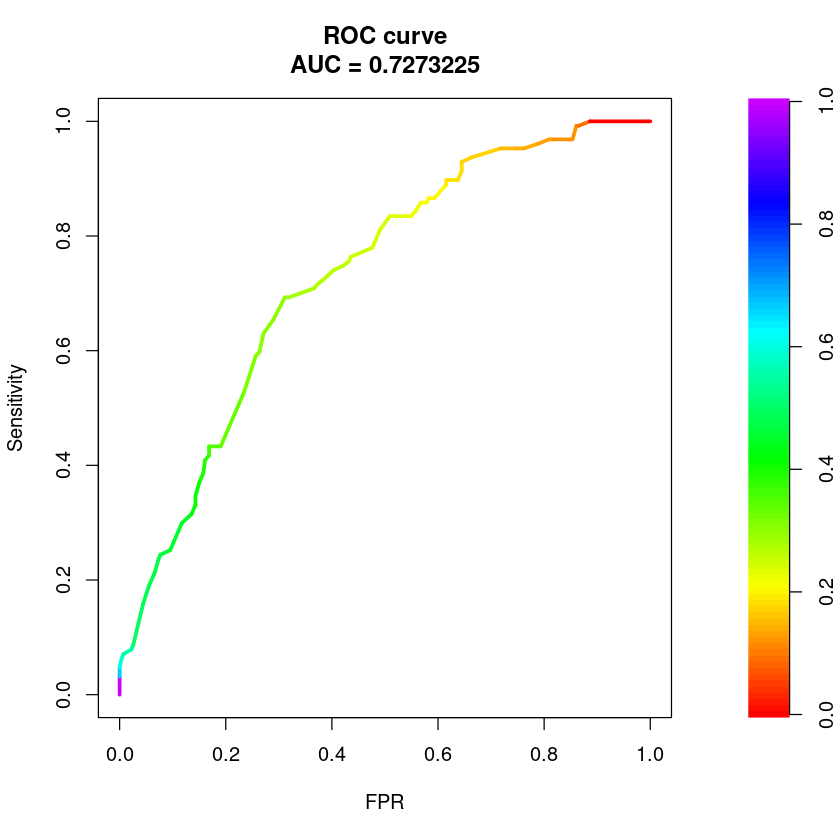

In [20]:
# install.packages("PRROC")
library(PRROC)
plot(roc.curve(scores.class0=res,weights.class0=x$admit,curve=TRUE))

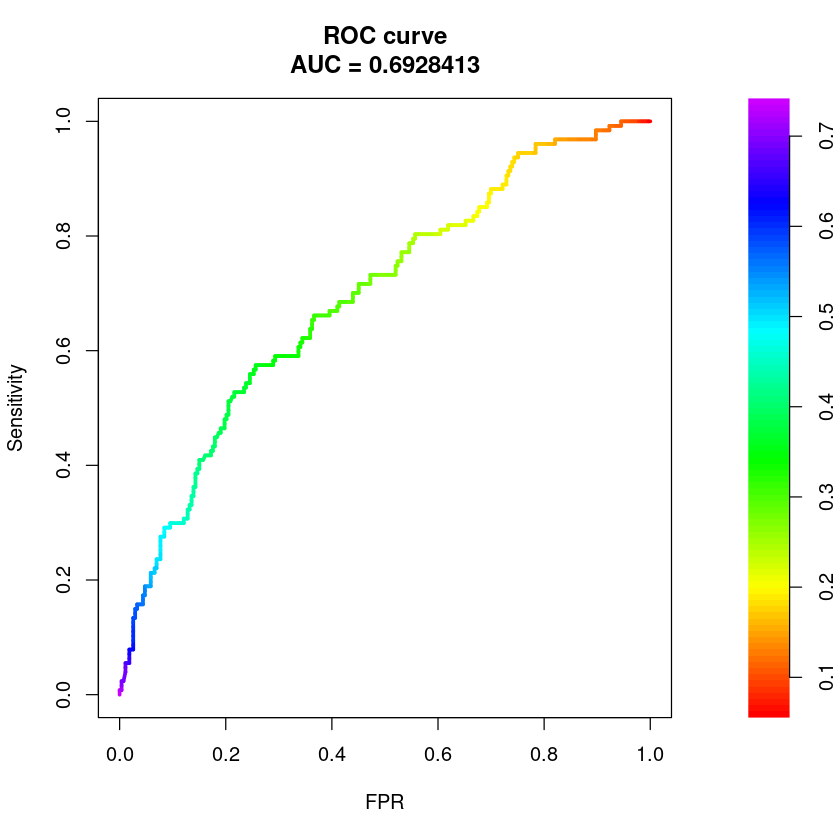

In [23]:
logist=glm(admit~.,data=x,family="binomial")
ans=predict(logist,type="response")
plot(roc.curve(scores.class0=ans,weights.class0=x$admit,curve=TRUE))

In [24]:
x

admit,gre,gpa,rank
<int>,<int>,<dbl>,<fct>
0,380,3.61,3
1,660,3.67,3
1,800,4.00,1
1,640,3.19,4
0,520,2.93,4
1,760,3.00,2
1,560,2.98,1
0,400,3.08,2
1,540,3.39,3


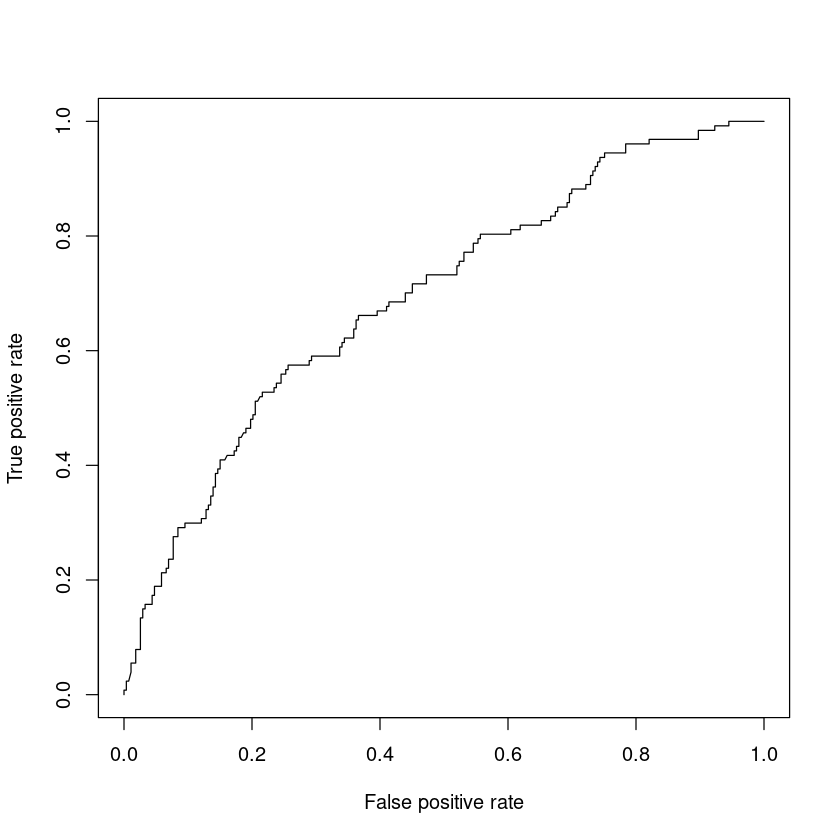

In [22]:
# install.packages("ROCR")
library(ROCR)
pred=prediction(ans,x$admit)
plot(performance(pred,"tpr","fpr"),colorize=FALSE)

# Task 2

In [2]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


### Subtask 1

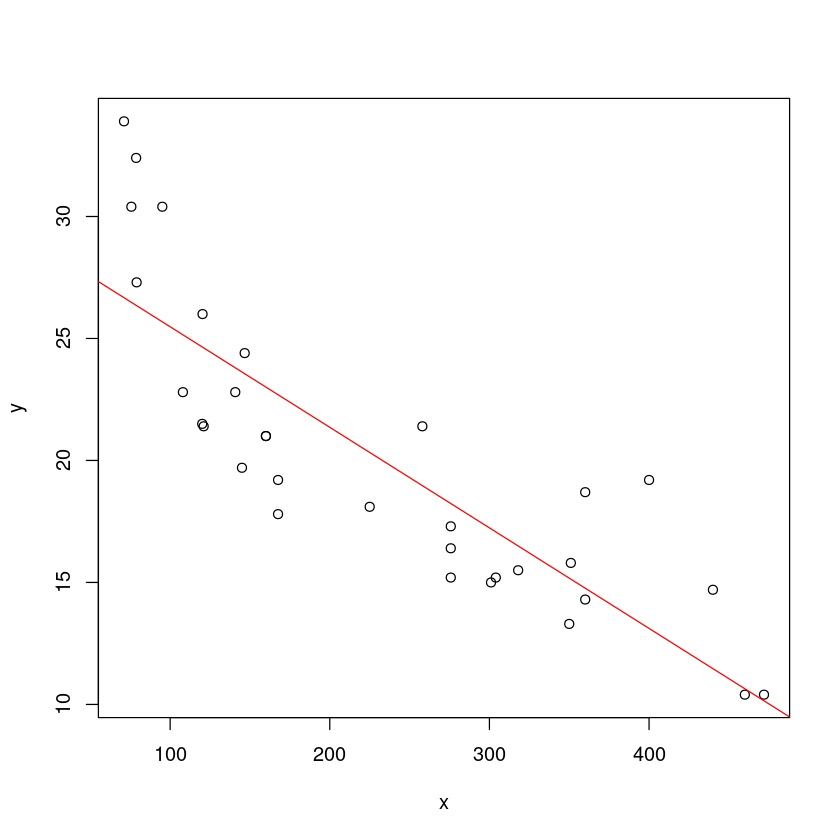

In [3]:
x <- mtcars$disp
y <- mtcars$mpg
plot(x, y)
L <- lm(y ~ x)
abline(L, col = "red")


In [4]:
summary(L)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8922 -2.2022 -0.9631  1.6272  7.2305 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.599855   1.229720  24.070  < 2e-16 ***
x           -0.041215   0.004712  -8.747 9.38e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.251 on 30 degrees of freedom
Multiple R-squared:  0.7183,	Adjusted R-squared:  0.709 
F-statistic: 76.51 on 1 and 30 DF,  p-value: 9.38e-10


In [5]:
L=lm(mpg~disp+hp+drat+wt+qsec,data=mtcars)
summary(L)


Call:
lm(formula = mpg ~ disp + hp + drat + wt + qsec, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5404 -1.6701 -0.4264  1.1320  5.4996 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 16.53357   10.96423   1.508  0.14362   
disp         0.00872    0.01119   0.779  0.44281   
hp          -0.02060    0.01528  -1.348  0.18936   
drat         2.01578    1.30946   1.539  0.13579   
wt          -4.38546    1.24343  -3.527  0.00158 **
qsec         0.64015    0.45934   1.394  0.17523   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.558 on 26 degrees of freedom
Multiple R-squared:  0.8489,	Adjusted R-squared:  0.8199 
F-statistic: 29.22 on 5 and 26 DF,  p-value: 6.892e-10


In [7]:
matr=mtcars[,3:7]
install.packages("Hmisc")
library(Hmisc)
matrr=rcorr(as.matrix(matr),type="spearman")

Installing package into ‘/home/alexkkir/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rappdirs’, ‘sass’, ‘cachem’, ‘memoise’, ‘mime’, ‘checkmate’, ‘htmlwidgets’, ‘rstudioapi’, ‘bslib’, ‘fontawesome’, ‘jquerylib’, ‘tinytex’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘rmarkdown’, ‘Formula’


Warning message in install.packages("Hmisc"):
“installation of package ‘Hmisc’ had non-zero exit status”


ERROR: Error in library(Hmisc): there is no package called ‘Hmisc’


In [ ]:
matrr$r

,disp,hp,drat,wt,qsec
disp,1.0000000,0.8510426,-0.68359210,0.8977064,-0.45978176
hp,0.8510426,1.0000000,-0.52012499,0.7746767,-0.66660602
drat,-0.6835921,-0.5201250,1.00000000,-0.7503904,0.09186863
wt,0.8977064,0.7746767,-0.75039041,1.0000000,-0.22540120
qsec,-0.4597818,-0.6666060,0.09186863,-0.2254012,1.00000000


In [ ]:
matrr$P

,disp,hp,drat,wt,qsec
disp,NA,6.791336e-10,1.613884e-05,3.346212e-12,8.108019e-03
hp,6.791336e-10,NA,2.277988e-03,1.953795e-07,3.105344e-05
drat,1.613884e-05,2.277988e-03,NA,7.593194e-07,6.170251e-01
wt,3.346212e-12,1.953795e-07,7.593194e-07,NA,2.148388e-01
qsec,8.108019e-03,3.105344e-05,6.170251e-01,2.148388e-01,NA


ERROR: Error in data.frame(..., check.names = FALSE): arguments imply differing number of rows: 15, 10


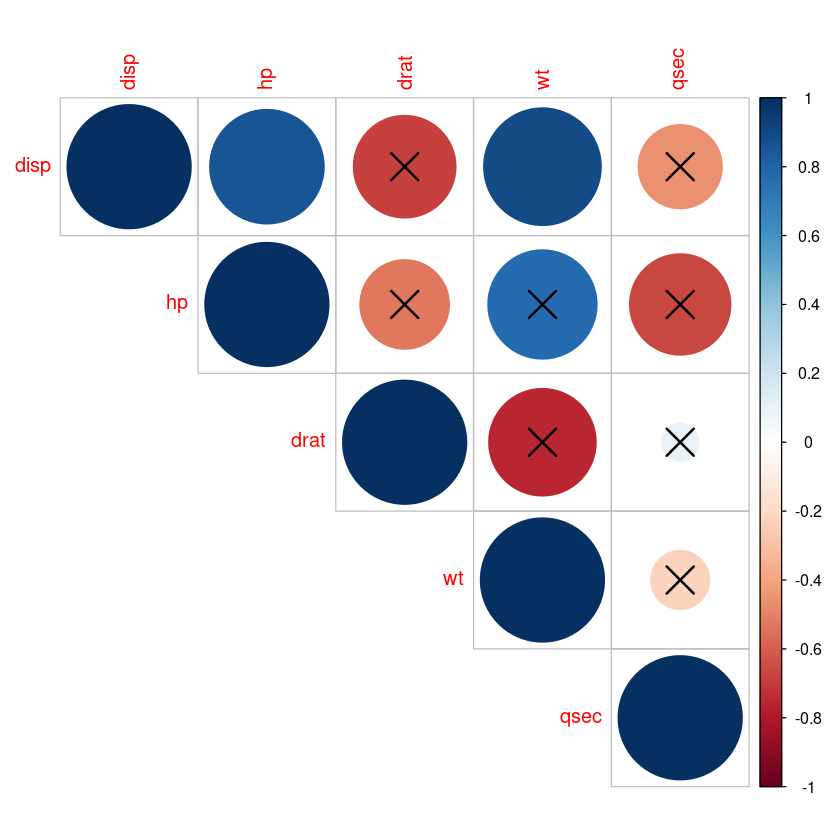

In [ ]:
# install.packages("corrplot")
# library(corrplot)
corrplot(matrr$r,type="upper",p.mat=matrr$P,sig.level=0.0000001)

In [ ]:
L=lm(mpg~wt+qsec,data=mtcars)
summary(L)


Call:
lm(formula = mpg ~ wt + qsec, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3962 -2.1431 -0.2129  1.4915  5.7486 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19.7462     5.2521   3.760 0.000765 ***
wt           -5.0480     0.4840 -10.430 2.52e-11 ***
qsec          0.9292     0.2650   3.506 0.001500 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.596 on 29 degrees of freedom
Multiple R-squared:  0.8264,	Adjusted R-squared:  0.8144 
F-statistic: 69.03 on 2 and 29 DF,  p-value: 9.395e-12


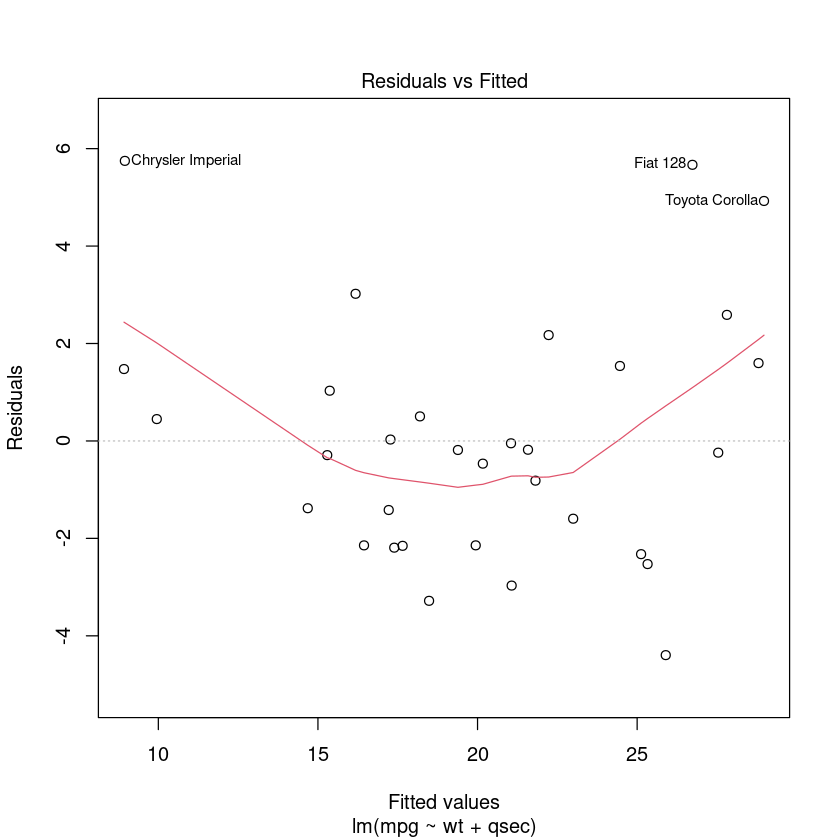

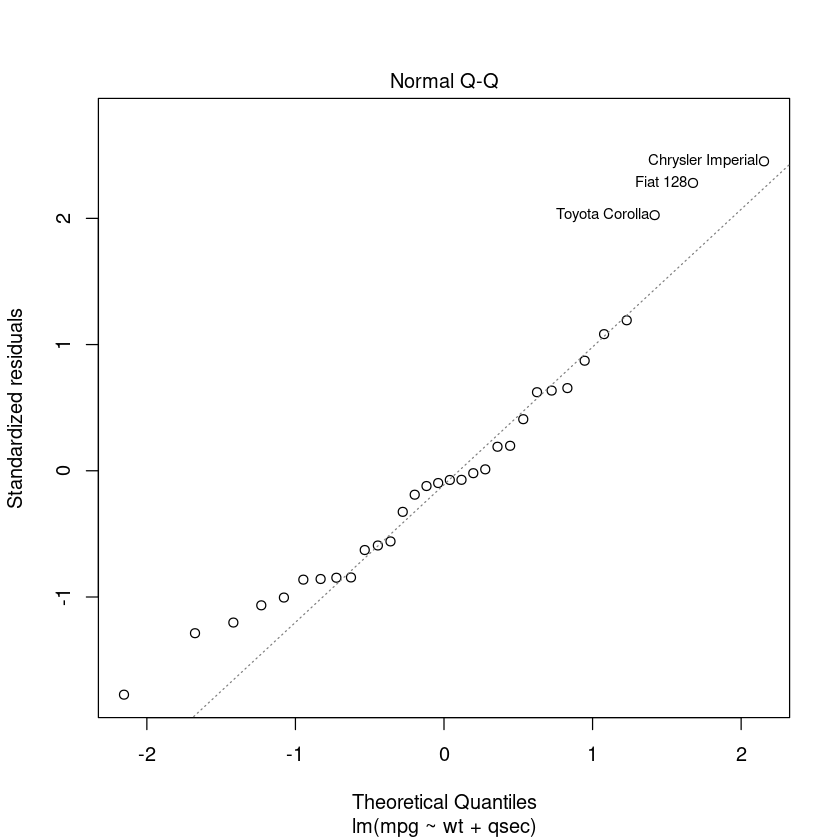

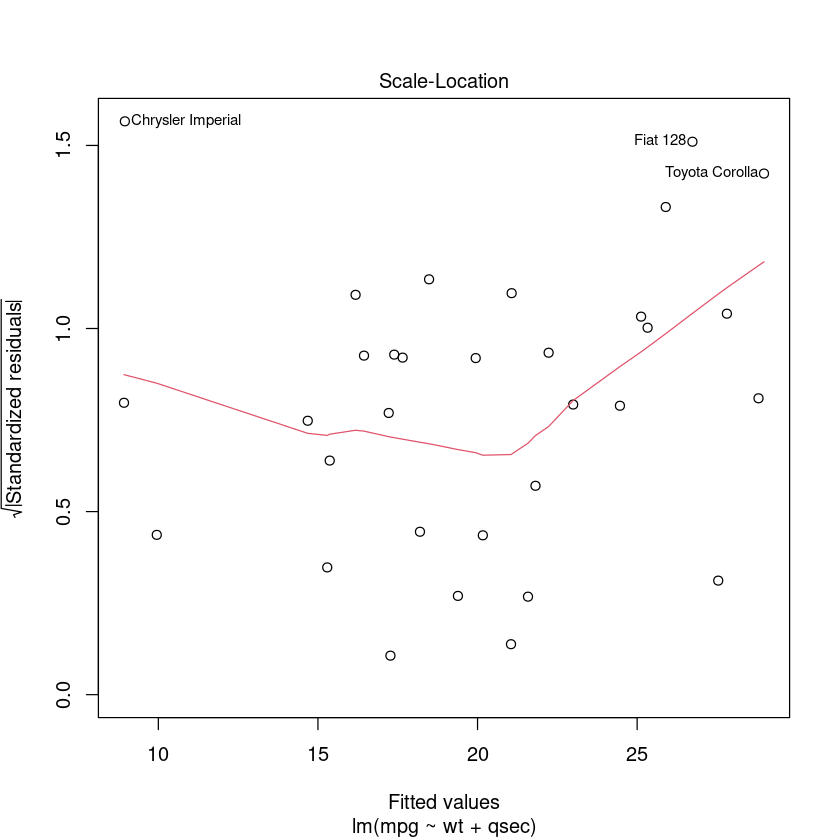

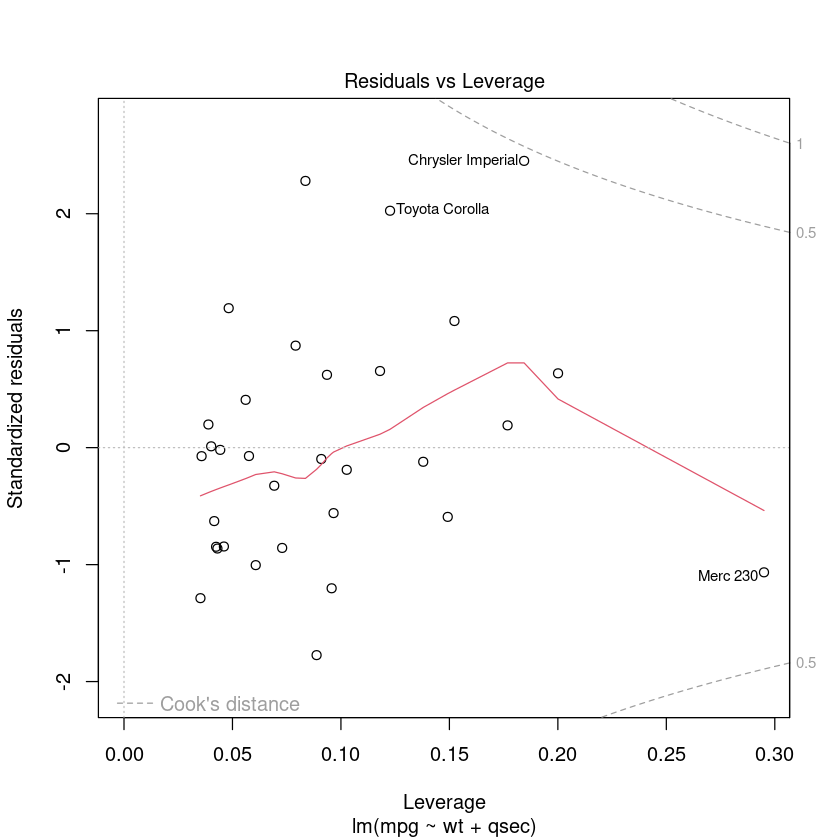

In [ ]:
plot(L)

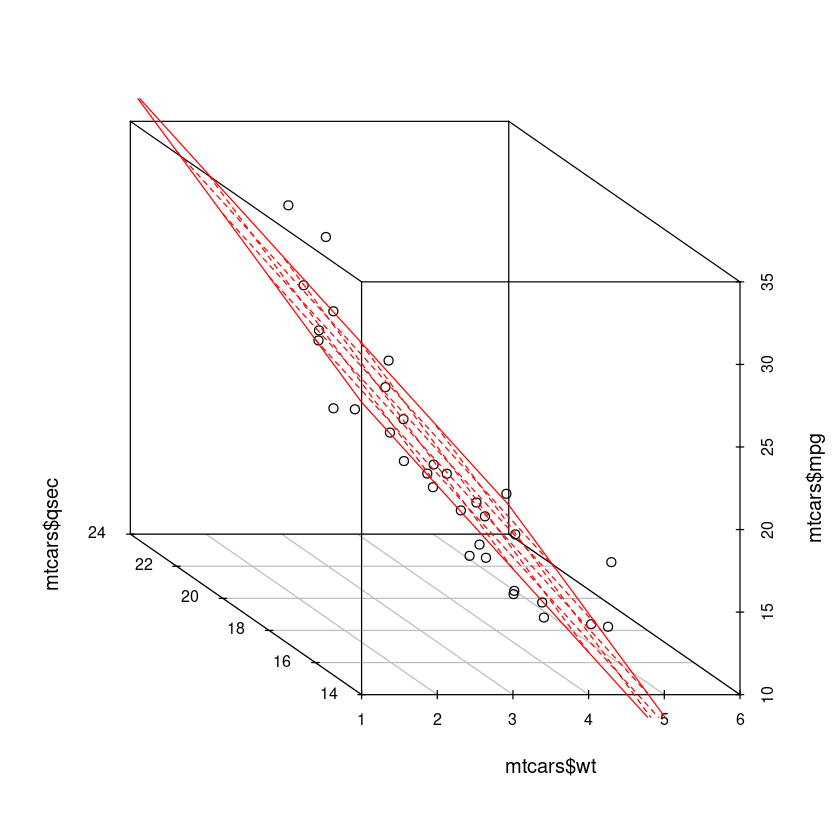

In [ ]:
# install.packages("scatterplot3d")
# library(scatterplot3d)
ss=scatterplot3d(mtcars$wt,mtcars$qsec,mtcars$mpg,angle=145)
ss$plane3d(L,col="red",lty.box = "solid")

### Subtask 1

In [ ]:
# install.packages("fANCOVA")
# library(fANCOVA)
# loess.as(mtcars[c("wt", "qsec")], mtcars[, 1])
band <- c("gcv", "aicc")
mse <- rep(NA, length(band))
for (k in 1:length(band)) {
  model <- loess.as(mtcars[c("wt", "qsec")], mtcars[, 1], criterion = band[k], plot = T)
  mse[k] <- mean((mtcars[, 1] - model$fitted)^2)
}
mse


ERROR: Error in loess.as(mtcars[c("wt", "qsec")], mtcars[, 1], criterion = band[k], : could not find function "loess.as"


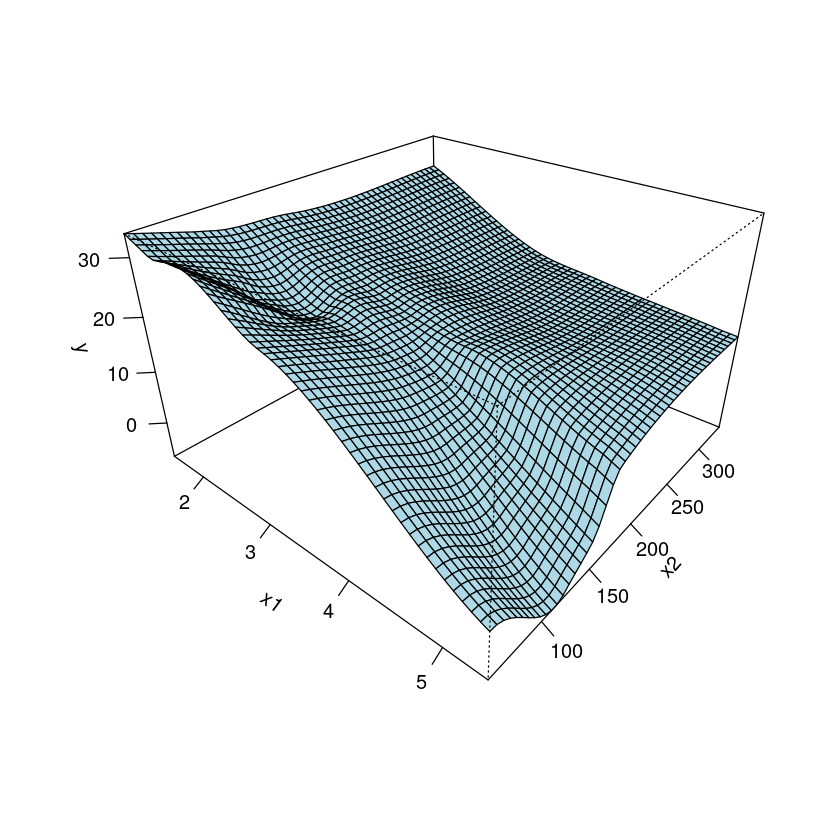

[1] 2.258948 4.248212

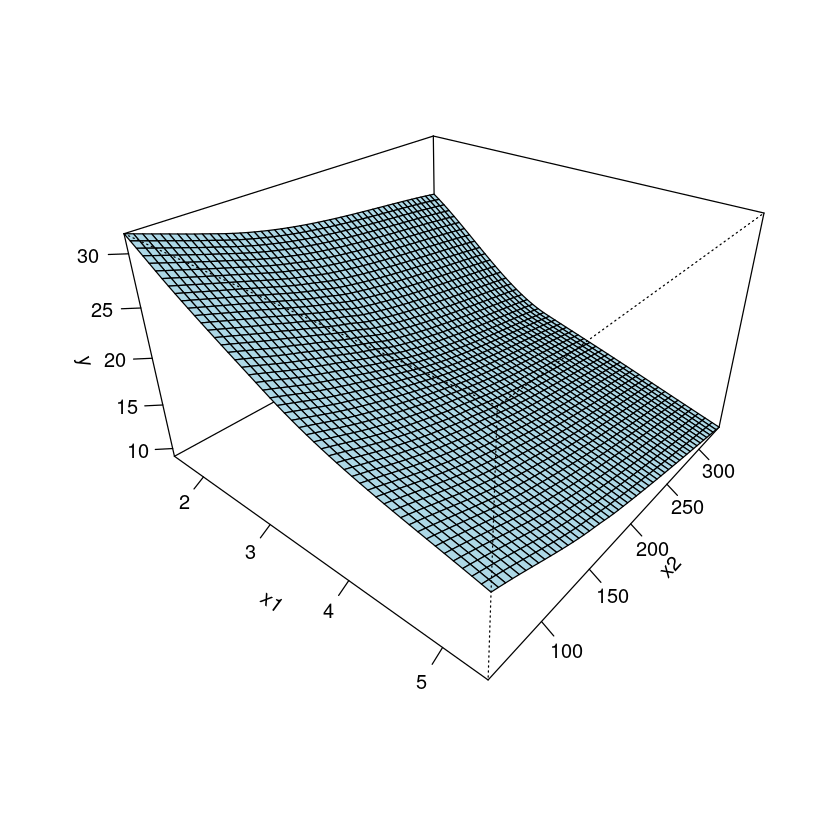

In [ ]:
band=c("gcv","aicc")
mse=rep(NA,length(band))
for (k in 1:length(band)){
  model=loess.as(mtcars[c("wt","hp")],mtcars[,1],criterion=band[k],plot=T)
  mse[k]=mean((mtcars[,1]-model$fitted)^2)
}
mse

### Subtask 3

[1] 22.25093 22.25093 23.34753 22.25093 18.20498 20.90747 13.80138 29.15835
 [9] 22.96013 18.97280 18.97280 17.29502 17.29502 17.29502 10.40000 10.41155
[17] 14.68250 29.94698 30.02701 29.78153 22.48159 15.35000 15.35000 13.80138
[25] 18.20498 29.94698 23.69861 23.07100 15.79966 18.20498 15.00000 21.95993

[1] 4.242127

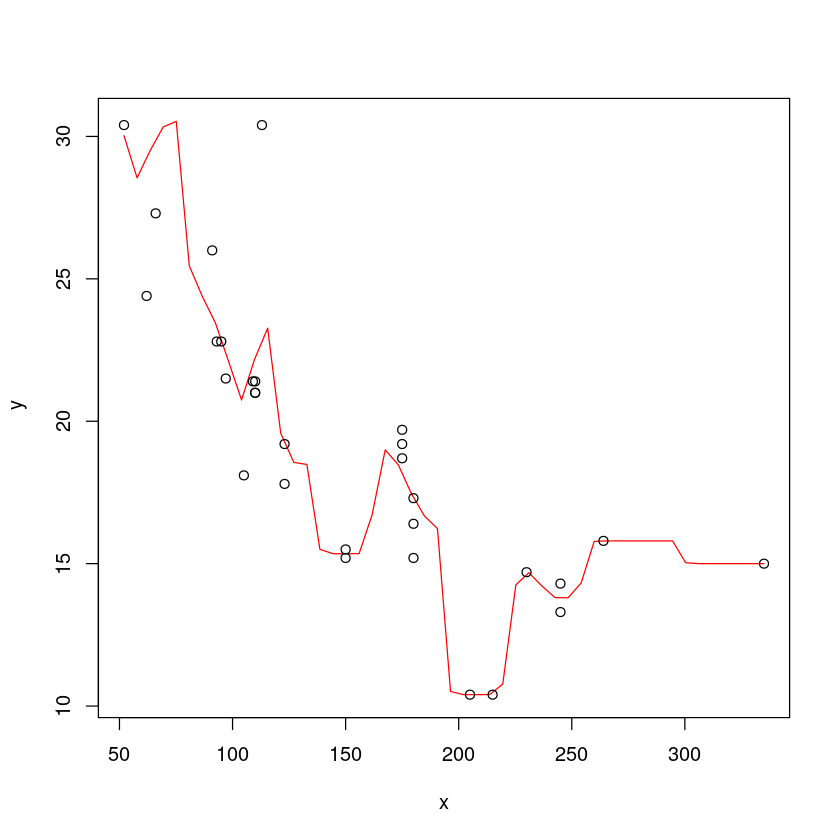

In [ ]:
x=mtcars$hp
y=mtcars$mpg
# install.packages("np")
# library(np)
NW=npreg(txdat=x,tydat=y)
fitted(NW)
plot(NW,col="red")
points(x,y)
mean((y-fitted(NW))^2)

, , 1

          [,1]      [,2]
[1,]  4.242127  4.242127
[2,] 11.678229 11.678229

, , 2

         [,1]     [,2]
[1,] 8.837688 8.837688
[2,] 8.403343 8.403343

[1] 53.15925

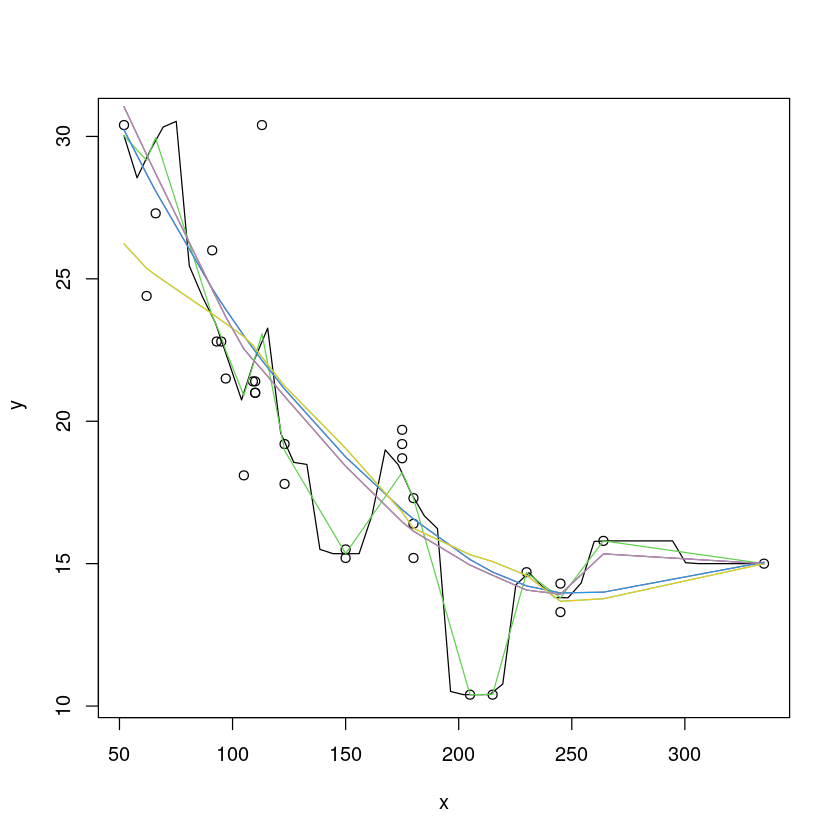

In [ ]:
ker=c("gaussian","epanechnikov")
band=c("cv.ls","cv.aic")
type=c("lc","ll")
mse=array(data=NA,c(length(ker),length(band),length(type)))
n=1
y=y[order(x)]
x=sort(x)
for (i in 1:length(ker)){
  for (j in 1:length(band)){
    for (k in 1:length(type)){
      NW=npreg(txdat=x,tydat=y, ckertype=ker[i],bw=band[j],regtype=type[k])
      mse[i,j,k]=mean((y-fitted(NW))^2)
      if (i*j*k==1){
        plot(NW)
        points(x,y)
      }
      else{
        n=n+1
        points(x,fitted(NW),col=n,type="l")
      }
    }
  }
}
mse
L=lm(mpg~hp,data=mtcars)
mean((y-fitted(L))^2)